# Neural Network From Scratch

- This lecture note introduces fundamentals of the mechanism for neural network, or deep learning.

- We will break our discussions into three main parts:
    - Building A Neural Network (How does the network work?)
        - Forward Propagation
        - Weights, Biases, and Activation functions
        - Matrix multiplication
    - Learning and Training (How does it learn?)
        - Loss Function
        - Gradients
        - Derivatives and Partial Derivatives
        - Gradient Descent
    - Gradient Descent (More on how does it learn.)
        - Batch
        - Mini-batch
        - Stochastic gradient descent

In [1]:
## Loading Dependencies
import numpy as np
import matplotlib.pylab as plt

## Workflow of Neural Network

![](../images/nn-flowchart.png)

## Neural Network Overview

### Deep Learning

![](../images/neural-network-propagation.gif)

### Forward Propagation
- Neural network is a type of machine learning algorithm modeled on human brains and nervous system.
- The model is believed to process information in a similar way to the human brain:
    - inputs and weights as the **dendrites**
    - neuron operations of weighted sums and activation as **neurons**
    - outputs as **axons**
- A neural network often consists of a large number of elements, known as **nodes**, working in parallel to solve a specific problem. These nodes are often organized into different **layers**.
- Each layer of the network transforms the input values into the output values based on the weights (parameters) of the nodes.
- The data transformation from the input to the output is in general referred to as **forward propagation** of the network.

### Backward Propagation

- When the predicted output is compared with the true label, we can evaluate the network performance by computing the **loss** of the network.
- Then we determine the proportion of the losses that may be attributed to each model parameter. This process goes from the losses of the predicted output backward to the original inputs. This step is referred to as the **back propagation** of the network.

### Neurons

- Neural network consists of neurons, which allow us to model non-linear relationships between input and output data.
- Given an input vector, traditional linear transformation can only model a linear relationship between X and y: 

$$ 
\hat{y} = w_0 + w_1 x_1 + w_2x_2 + w_3x_3 +...+w_nx_n
$$

- A neron is like a linear transformation but with an extra **activation function**.
- This mechanism of activation function in each neuron will ultimately determine the output of the neuron.

$$\begin{align}
\textit{Neuron Output Value} & =  h(\hat{y}) \\
& = h(w_0 + w_1 x_1 + w_2x_2 + w_3x_3 +...+w_nx_n)
\end{align}$$

![](../images/neuron.png)

### Activation Functions

- In neural network, the activation function of a node determines whether the node would activate the output given the **weighted sum of the input values**. 

- Different types of activation functions may determine the cut-offs for output activation in different ways.

- **Sigmoid** function: This function converts the $y$ values into values within the range of 0 and 1 (i.e., a probability-like value).

$$ h(y) = \frac{1}{1 + \exp(-y)}$$

- **Step** function: This function converts the $y$ values into binary ones, with only the positive values activated.

$$ h(y)= \left\{ 
     \begin{array}\\
     0 & (y \leq 0) \\
     1 & (y > 0)
     \end{array}
\right.
$$

- **ReLU** (Rectified Linear Unit) function: This function converts the $y$ values by passing only positive values and zero for negative $y$.

$$ h(y)= \left\{ 
     \begin{array}\\
     y & (y > 0) \\
     0 & (y \leq 0)
     \end{array}
\right.
$$

- **Softmax** function: This function converts the $y$ values into normalized probability values.

$$
h(y_k) = \frac{\exp(y_k)}{\sum_{i = 1}^{n} \exp({y_i})}
$$

### Activation Functions in Python

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


# def softmax(x):
#     exp_x = np.exp(x)
#     sum_exp_x = np.sum(exp_x)
#     y = exp_x/sum_exp_x
#     return y


def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)  # avoid overflow issues
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

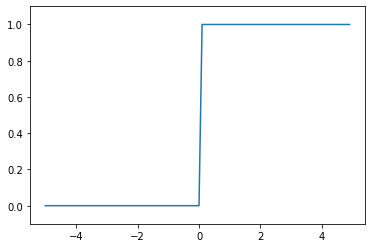

In [3]:
# step function
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, step_function(x))
plt.ylim(-0.1, 1.1)
plt.show()

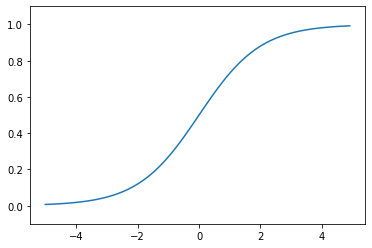

In [4]:
## sigmoid function
plt.plot(x, sigmoid(x))
plt.ylim(-0.1, 1.1)
plt.show()

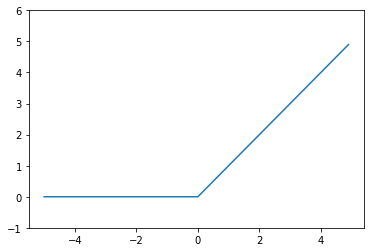

In [5]:
# ReLU
plt.plot(x, relu(x))
plt.ylim(-1, 6)
plt.show()

In [58]:
x = [2, 5, 7, 10]
print(np.round(softmax(x),2))

[0.   0.01 0.05 0.95]


### From Nodes to Layers

- A neural network can be defined in terms of **depths** and **widths** of its layers.
    - **Depth**: How many layers does the network have?
    - **Width**: How many neurons does each layer have?
- A network can consist of several layers.
- Each layer can have various numbers of neurons.
- For each layer, the shape of the input tensor, the number of its neurons, and the shape of its output are inter-connected. These settings will determine the number of parameters (i.e., **weights**) needed to train.


![](../images/neural-network-dense-layer.gif)

### Layer, Parameters, and Matrix Mutiplication

- Each layer transforms the input values into the output values based on its layer parameters.
- Mathematically, these values transformation is a matrix multiplication, running in parallel for all nodes of the layer.
- In Deep Learning, the input and output values are represented as a multi-dimensional tensor.
    - A 1D tensor is a vector.
    - A 2D tensor is a two-dimensional array.
    - A 3D tensor is a three-dimensional array.

![](../images/neural-network-dense-layer-1.gif)

![](../images/neural-network-dense-layer-2.gif)

### Types of Neural Networks

- **Multi-Layer Perceptron** (Fully Connected Network)
    - Input Layer, one or more hidden layers, and output layer.
    - A hidden layer consists of neurons (perceptrons) which process certain aspect of the features and send the processed information into the next hidden layer.
    

- **Convolutional Neural Network (CNN)**
    - Mainly for image and audio processing
    - Convolution Layer, Pooling Layer, Fully Connected Layer

- **Recurrent Neural Network (RNN)**
    - Preferred methods in NLP
    - Most fully-connected networks do not remember the steps from previous situations and therefore do not learn to make decisions based on **context** in training.
    - RNN stores the past information and all its decisions are taken from what it has learned from the past.
    - RNN is effective in dealing with time-series data (e.g., text, speech).

![](../images/s2s-rnn.jpeg)

## Building a Neural Network Model in Python

### Packages in Focus

- `tensorflow`: It is an open source machine learning library used for numerical computational tasks developed by Google.
- `tensorflow.keras`: It is a high level API built on top of Tensorflow. It originated as an independent library and now has been incorporated as part of Tensorflow 2+.

- Usually we need to define the architecture of the neural network model in terms of **depths** and **widths** of the layers.
- After we define the structure of the network and initialize the values for all parameters, the training requires an iterative processing involving:
    - **Forward Propagation**: It refers to the process of transforming the data values by moving the input data through the network to get output.
    - Define your **loss function**.
    - Calculate **Total Error** based on the loss function.
    - Calculate **Gradients** via **Back Propagation**
    - Update the **weights** based on gradients.
    - Iterate the process until the stop-condition is reached.

### Create Model

- In `tensorflow.keras`, we can create models in two ways:
    - Sequential API (`keras.Sequential`)
    - Functional API (`keras.model`)

In [7]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

## Sequential API to create model
model = keras.Sequential()
model.add(keras.Input(shape=(2)))
model.add(layers.Dense(4, activation="relu", name="dense_layer_1"))
model.add(layers.Dense(2, activation="relu", name="dense_layer_2"))

# Sequential API (Another alternative)
# model = keras.Sequential(
#     [
#         keras.Input(shape=(2)),
#         layers.Dense(4, activation="relu"),
#         layers.Dense(2, activation="relu")
#     ]
# )

In [8]:
# Functional API (A bit more flexible)
inputs = keras.Input(shape=(2,))
x = layers.Dense(4, activation="relu", name="dense_layer_1")(inputs)
outputs = layers.Dense(2, activation="relu", name="dense_layer_2")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

### Useful Modules in keras

- `keras.utils`:
    - `to_categorical()`: To convert a class/label list into a one-hot encoding matrix
    - `print_summary()`: Print the summary of the model
    - `plot_model()`: Plot the model structure

In [10]:
from keras.utils import to_categorical, plot_model

plot_model

<function tensorflow.python.keras.utils.vis_utils.plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)>

:::{tip}

If you create the model using the `Sequential()` method, you will not be able to check the `model.summary()` or `plot_model()` until the model has been compiled and fitted.

:::

In [11]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 4)                 12        
_________________________________________________________________
dense_layer_2 (Dense)        (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


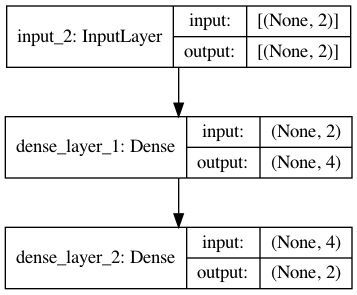

In [12]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

### Useful Modules in keras

#### `keras.utils`:
    
- `to_categorical()`: To convert a class/label list into a one-hot encoding matrix
- `plot_model()`: Plot the model structure

In [13]:
from keras.utils import to_categorical, plot_model

labels = ["X", "X", "Y", "Y", "Z", "Z"]

In [14]:
## Text Labels to Sequences
labels_dict = {x: i for i, x in enumerate(set(labels))}
labels_int = [labels_dict[l] for l in labels]

In [15]:
print(labels_int)

[1, 1, 2, 2, 0, 0]


In [16]:
## Sequences to One-Hot Encoding
to_categorical(labels_int)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

####  `keras.layers`

- `Dense`
- `SimpleRNN`, `LSTM`, `GRU`
- `Dropout`, `Flatten`
- `Attention`, `AdditiveAttention`

#### Other modules

- `keras.losses`: Loss functions
- `keras.optimizers`: Optimization is an important process which optimizes the input weights by comparing the prediction and the loss function.
    - `keras.optimizers.RMSprop`
    - `keras.optimizers.Adam`
    - `keras.optimziers.SGD`
- `keras.metrics`: Metrics for model evaluation

## A Quick Example of Model Training

![](../images/keras-workflow.png)

- Steps for Model Training
    - Create model
    - Compile model
    - Fit model
    - Evaluate model
    - Predict 

### Data

- We create random samples, where each sample is characterized by two random numbers (e.g., grades in subjects)
- Each sample is also labeled with a binary class label (e.g., fail or pass)
- We create three datasets: **training**, **validation**, and **testing** sets.

In [17]:
import numpy
numpy.random.seed(123)

# train set
x_train = np.random.random((100, 2))
y_train = np.random.randint(0, 2, (100, ))

# val set
x_val = np.random.random((100, 2))
y_val = np.random.randint(0, 2, (100, ))

# test set
x_test = np.random.random((100, 2))
y_test = np.random.randint(0, 2, (100, ))

In [18]:
print(x_train.shape)
print(y_train.shape)

(100, 2)
(100,)


In [19]:
print(x_train[:5, ])
print(y_train[:5])

[[0.69646919 0.28613933]
 [0.22685145 0.55131477]
 [0.71946897 0.42310646]
 [0.9807642  0.68482974]
 [0.4809319  0.39211752]]
[1 1 0 1 0]


### Model Training

In [20]:
# create
model = keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(16))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
# fit
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 220ms/step - loss: 0.6937 - accuracy: 0.5142 - val_loss: 0.6875 - val_accuracy: 0.5400
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6904 - accuracy: 0.5205 - val_loss: 0.6882 - val_accuracy: 0.5400
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6896 - accuracy: 0.5153 - val_loss: 0.6888 - val_accuracy: 0.5400
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6846 - accuracy: 0.5257 - val_loss: 0.6893 - val_accuracy: 0.5400
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6856 - accuracy: 0.5267 - val_loss: 0.6899 - val_accuracy: 0.5400
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6795 - accuracy: 0.5538 - val_loss: 0.6900 - val_accuracy: 0.5400
Epoch 7/50
4/4 [==============================] - 0s 46ms/step - loss: 0.6863 - accuracy: 0.5070 - val_loss: 0.6901 - val_accuracy: 0.5300
Epoch 8/50
4/4 [==========

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


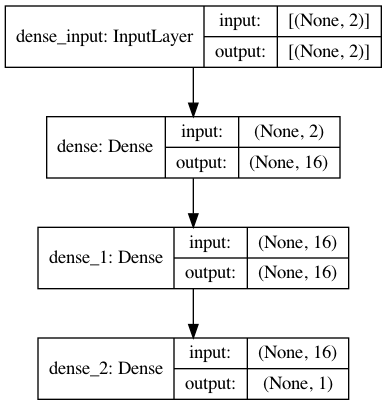

In [24]:
keras.utils.plot_model(model, show_shapes=True)

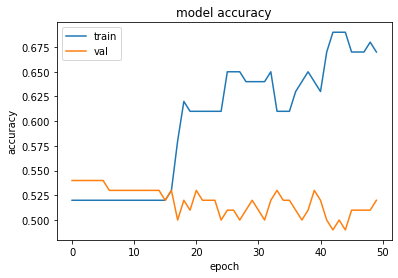

In [25]:
## Plot history from model.fit()
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluation and Prediction

In [26]:
## Evaludate
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.7311 - accuracy: 0.4200


[0.7310649156570435, 0.41999998688697815]

In [27]:
## Predict
x_new = numpy.random.random((5, 2))
model.predict(x_new)

array([[0.4847082 ],
       [0.47971576],
       [0.48676744],
       [0.42845953],
       [0.5539858 ]], dtype=float32)


## Learning and Training

### How does the neural network learn the parameters?

- Forward propagation shows how the network takes the input values, transforms them, and produces the predicted output values based on the network parameters (i.e., weights).
- The network needs to learn the weights that best produce the output values according to some **loss function**, i.e., how different is the prediction from the true label?
- Crucially, we need to compute the differences between the **predicted** outputs of the network and the **true** target outputs. 
- The model should aim to minimize these differences, which are commonly referred to as **errors** of the model.


### Loss Functions

- If the target ouputs are numeric values, we can evaluate the errors (i.e., the differences between the actual model outputs and the target outputs) using the **mean square error** function.
    - Mean Square Error: $E = \frac{1}{2}\sum(y_k - t_k)^2$
- If the target outputs are labels, we can evaluate the errors (i.e., the differences between the actual model labels and the target labels) using the **cross entory error** function.
    - Cross Entropy Error: $E= -\sum_{k}t_k\log(y_k)$
- The function used to compute the errors of the model is referred to as the **loss function**.

### Principles for Loss Functions

Problem Type | Last-Layer Activation | Loss Function in Keras| `y` Encoding |
--|--|--|--|
Binary Classification | sigmoid | `binary_crossentropy()`| Integer Encoding |
Binary Classification | softmax | `SparseCategoricalCrossentropy(from_logits=False)`| Integer Encoding |
Multiclass Classification | softmax | `categorical_crossentropy()`| One-hot Encoding |
Regression|None|`mes`| Floating-point|

## Categorical Variables Encoding

### What's wrong with categorical variables?

- Before we look at the examples of loss computation, we need to talk about the ways of encoding **categorical** labels.
- Remember, machine doesn't understand characters. If we have class labels like male/female, positive/negative, or each word tokens, we may need to convert these strings into machine-readable numerical values.
- This step is called **encoding**.
- Most importantly, machine learning and deep learning both require input and output variables to be **numbers**.

### Three Ways of Encodings

- **Integer** (Sequence) Encoding: Each unique label is mapped to an integer
- **One-hot** Encoding: Each unique label is mapped to a binary vector
- **Embeddings** Encoding: Each unique label is mapped to a learned vectorized representation (i.e., embeddings)

### Steps

- Given a corpus, we can create its **vocabulary** (at the word-token level, or sometimes at the character level).
- We can associate every word type with a **unique integer index** (i.e., integer encoding).
- We can further turn this integer index $i$ into a **binary vector** of size $N$ (the size of vocabulary). The vector is all zeros except for the $i$th entry, which is 1 (i.e., one-hot encoding).
- We can turn the integer index into a **dense, low-dimensional floating-point vectors** (i.e., embedding encoding).
    - Learn embeddings jointly with the main task (i.e., `Embedding` layer)
    - Use pretrained word embeddings that were precomputed using a different machine learning task.

In [28]:
## Given Label
labels = ['male', 'female', 'female', 'male']

## Create Dictionary
labels_dict = { x:i for i,x in enumerate(set(labels))}
print(labels_dict)

## Integer Encoding
labels_int = [labels_dict[l] for l in labels]
print(labels_int)

## One-hot Encoding
labels_oh = keras.utils.to_categorical(labels_int)
print(labels_oh)

{'male': 0, 'female': 1}
[0, 1, 1, 0]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [29]:
###########################################
## Integer Encoding and One-hot Encoding ##
## Using sklearn                         ##
###########################################

## Integer Encoding
from sklearn.preprocessing import OrdinalEncoder
labels = ['male', 'female', 'female', 'male']
labels = np.array(labels).reshape(-1, 1)

oe = OrdinalEncoder(dtype='int16')
labels_int = oe.fit_transform(labels)
print(labels_int)

## One-hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
labels_ohe = ohe.fit_transform(labels)

print(labels_ohe.toarray())

[[1]
 [0]
 [0]
 [1]]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


### One-hot Encoding and Loss Function

- With one-hot encoding, we can convert any categorical variable into a numeric vector. 
- And if we specify our network output to be a vector of the same size, we can compute the differences between the output vector and the true numeric vector.

- When the target class label is a binary one (e.g., name-gender prediction):

![](../images/neural-network-loss-binary.jpeg)

- When the target class label is a multi-level one (e.g., next-word prediction):
![](../images/neural-network-loss-multicat.jpeg)

## Examples of Loss Errors (skipped)

### Error based on One Sample

- The following is a simple example showing how to compute the loss for a case of prediction.

In [30]:
def mean_square_error(y, t):
    return (0.5 * np.sum((y - t)**2))


def cross_entropy_error(y, t):
    delta = 1e-7  # avoid log(0)
    return -np.sum(t * np.log(y + delta))

In [31]:
## mean square error
y = [0.1, 0.05]  # predicted values
t = [1, 0]  # true label
print(mean_square_error(np.array(y), np.array(t)))
print(cross_entropy_error(np.array(y), np.array(t)))

0.40625
2.302584092994546


### Errors based on Batch Samples

- The following is a simple example showing how to compute the average loss of a sample of batch size N cases.

- If the training is based on a sample of batch size *N*, we can compute the average loss (or total errors) of the batch sample:

$$ E = - \frac{1}{N}\sum_n\sum_k t_{nk}\log y_{nk}$$

- We can revise the `cross_entropy_error()` function to work with outputs from a min-batch sample.

In [32]:
# adjust the function to for batch sample outputs
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

- When the labels uses one-hot encoding, the function can be simplified as follows:

In [33]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    # because for one-hot labels
    # cross-entropy sums only the values of the true labels `1`
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## Gradient Descent

### How do we adjust the model parameters?

- With the **Loss Function**, we can now perform the most important step in model training &mdash; adjusting the **weights** (i.e., **parameters**) of the model.
- The mechanism behind the neural network training steps is that we need to figure out:
    - how the change of a specific **parameter** (i.e., weight) in the model may lead to the change (i.e., decrease) of the values from the **Loss Function**? (i.e., How much does a change in a specific weight affect the total error?)
- Then we would know how much of the total error each parameter in the model is responsible for.
- These are the bases for parameter adjustments.
- All we need to do is the adjust the weights **in proportion to** the changes that the parameter is responsible for.
- This optimization method to finding a combination of weights that minimize the loss function is called **Gradient Descent**.

### Gradients

- The error that a specific weight is responsible for is referred to as the **gradient** of the parameter.
- Mathematically, the gradient of a weight is the **partial derivative** of a weight in relation to the **loss function**.
- Then we adjust the weight in proportion to its gradient:

$$
{W}_{new} = W_{original} + \eta \times \textit{Gradient}_{W_{original}}
$$

- The $\eta$ is a hyperparameter in deep learning. This parameter controls how fast the model learns. This $\eta$ is referred to as the **learning rates**.

### Intuition of Gradients: An Example (skipped)

- Let's assume that we are training a model with two parameters, $x_0$ and $x_1$, and the loss function is $f(x_0, x_1)$.
    - When a function includes more than one parameters, we can compute the partial derivative of the function with respect to each parameter.
    - When all partial derivatives are concatenated into a vector, this vector is called the **gradient**.
    - That is, for the above loss function with two parameters (e.g., $f(x_0, x_1) = \beta x_0 + \beta x_1$), we can calculate the partial derivatives of each parameter all at once,and represent them in a vector, which is referred to as **gradient**, i.e:
$$
(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})
$$

- Each parameter estimation value pair, $(x_0,x_1)$, should correspond to a gradient.

- Intuitive understanding of the gradient:
    - The gradient of a specific $(x_0,x_1)$ indicates how the changes of the parameter values $(x_0,x_1)$ may contribute to the change of $f(x_0,x_1)$. 
    - The gradient of a specific $(x_0,x_1)$ is a **vector** with the direction pointing at the **global minimum** of the loss function.
    - The farther the $(x_0,x_1)$ is way from the global minimum, the larger the gradient vector.
    
- In Deep Learning, the training goes as follows:
    - We initialize the parameters $x_0,x_1$ with some values $p_0, p_1$;
    - We compute the loss function $f(x_0,x_1)$
    - We compute the gradient of $f(x_0,x_1)$ when the parameter $x_0 = p_0$ and $x_1 = p_1$
    - We use the gradient to determine how to update/modify all the model parameters, i.e., 
    
$$
x_0 = x_0 + \eta\frac{\partial f}{\partial x_0} \\
x_1 = x_1 + \eta\frac{\partial f}{\partial x_1} 
$$

- The $\eta$ is again **learning rate**.

### Types of Gradient Descent

- **Batch** Gradient Descent: Update the model weights after one epoch of the entire training set.
- **Stochastic** Gradient Descent (SGD): Update the model weights after every instance of the training set (online).
- **Mini-batch** Gradient Descent: Update the model weights after a subset of the training set. (Recommended!)

### Gradients in Python (skipped)

In the following graph, each vector represents the gradient at a specific $(x_0, x_1)$, i.e., when $x_0 = p_0$ and $x_1 = p_1$:

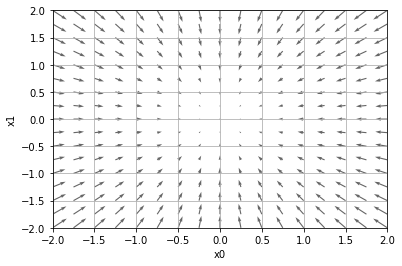

In [34]:
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 値を元に戻す

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

## Overfitting and Underfitting


### Optimization vs. Generalization

- ML is always dealing with the tension between **optimization** and **generalization**.
    - Optimization: the process of adjusting a model to get the best performance possible on the training data (i.e., to minimize the *bias* of the model)
    - Generalization: the performance of the model on data it has never seen before (i.e., to minimize the **variation** of the model performance on different datasets.)

### Overfitting/Underfitting

- During the training stage, if both the losses on training data and validation data are dropping, the model is **underfit** and in a way to be better fit. (Great bias, Small variation)
- During the training, if the loss on the validation data stalls while that of the training data still drops, the model starts to **overfit**. (Small bias, Great variation)

### How to Deal With Overfitting?

- Get more training data
- Reduce the capacity of the network (e.g., number of layers/nodes)
- Add weight **Regularization**
- Add **dropout**

### Regularization

- What is **regularization**?
    - Modulate the quantity of information that the model is allowed to store
    - Add constraints on what information the model is allowed to store
- Weight regularization is to add to the loss function of the network a **cost** associated with having large weights.
- That is, large weights will have greater penalties to the loss function, hence discouraged.
- Common methods:
    - L1 regularization: the cost added is proportional to the **absolute values** of the weights (`keras.regularizer.l1()`)
    - L2 regularization: the cost added is propositional to the **square values** of the weights (`keras/regularizer.l2()`)

### Dropout

- Dropout consists of randomly dropping out a number of output features of the applied layer during training.
- The dropout rate is the **fraction** of the features that are **zeroed out**. 
- The dropout rate is usually set between 0.2 and 0.5.
- In `keras`, it can an independent layer, `keras.layers.dropout()`, or paremters to be set within specific layers (e.g., `keras.layers.LSTM()`).

### Heuristics for Regularization

- Applying dropout before a recurrent layer hinders learning rather than helping with regularization.
- The same dropout mask (the same pattern of dropped units) should be applied at every time step, instead of a dropout mask that varies randomly from timestep to timestep. (Yarin Gal)
- In order to regularize the representations formed by the recurrent gates of layers (e.g., LSTM and GRU), a temporally constant dropout mask should be applied to the inner activations of the layer (a recurrent dropout mask). (Yarin Gal)

## Some Math (Skipped)

The following presents some important mathematical constructs related to the understanding of neural network.


### Chain Rule and Back Propagation

- Because there are many parameters in a network, we can compute the gradients (or partial derivatives) of all the weights using the chain rules of derivatives.
- Specifically, the total error is essentially broken up and distributed back through the network to every single weight with the help of chain rule:

$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y}.\frac{\partial y}{\partial x}$$

- This process is referred to as **back propagation**: moving back through the network, back-propagating the total errors to every single weight, and updating the weights.
- The principle of weights-updating: the larger the gradient, the more the adjustments.

$$W_1 = W_1 - \eta \frac{\partial E}{\partial W_1}$$

- The above adjustment formula suggests that the weight updates are proportional to the partial derivatives of the weight. 
- The **$\eta$** in the formula controls the amount of adjustment, which is referred to as the **learning rate**.

### Elementwise Operations of Matrix

- A two-dimensional matrix

$$ x = 
\begin{pmatrix}
1&2 \\
3&4 \\
5&6 \\
\end{pmatrix}
$$

In [35]:
x = np.array([[1, 2], [3, 4], [4, 6]])
x

array([[1, 2],
       [3, 4],
       [4, 6]])

In [36]:
print(x + 1)
print(x * 5)
print(x / 5)

[[2 3]
 [4 5]
 [5 7]]
[[ 5 10]
 [15 20]
 [20 30]]
[[0.2 0.4]
 [0.6 0.8]
 [0.8 1.2]]


- Matrix Elementwise Multiplication


$$\begin{pmatrix}
1&2 \\
3&4 \\
\end{pmatrix}
\begin{pmatrix}
5&6 \\
7&8
\end{pmatrix} =
\begin{pmatrix}
5&12 \\
21&32
\end{pmatrix}
$$



In [37]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
print(x)
print(y)
print(x * y)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[ 5 12]
 [21 32]]


### Broadcast

In matrix elementwise computation, the smaller tensor will be **broadcasted** to match the shape of the larger tensor.

- Axes (called broadcast axes) are added to the smaller tensor to match the `ndim` of the larger tensor.
- The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

$$\begin{pmatrix}
1&2 \\
3&4 \\
\end{pmatrix}
\begin{pmatrix}
10&20
\end{pmatrix} =
\begin{pmatrix}
10&40 \\
30&80
\end{pmatrix}
$$

In [38]:
x = np.array([[1, 2], [3, 4]])
y = np.array([10, 20])
print(x.shape)
print(y.shape)
xy = x * y
print(xy)
print(xy.shape)

(2, 2)
(2,)
[[10 40]
 [30 80]]
(2, 2)


### Matrices Dot Production

![](../images/matrices-dot-product.png)
(Source: Chollet [2018], Ch 2., Figure 2.5)

- The most common applications may be the **dot product** between two matrices. 
- You can take the dot product of two matrices x and y (`dot(x, y)`) if and only if `x.shape[1] == y.shape[0]`. The result is a matrix with shape (`x.shape[0]`, `y.shape[1]`), where the coefficients are the vector products between the rows of $x$ and the columns of $y$. 

$$\begin{pmatrix}
1&2 \\
3&4 \\
5&6
\end{pmatrix}
\begin{pmatrix}
5&6&7 \\
8&9&10
\end{pmatrix} =
\begin{pmatrix}
21&24&27 \\
47&54&62 \\
73&84&95
\end{pmatrix}
$$

In [39]:
x = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[5, 6, 7], [8, 9, 10]])

xy_dot = np.dot(x, y)
print(xy_dot)

[[21 24 27]
 [47 54 61]
 [73 84 95]]


### Matrices Dot Production and Forward Propagation

- For example, let's assume that we have a word, one-hot encoded as [0,1,0,0,0,0].
- An embedding model consists of parameters like the two-dimensional tensor shown below.
- The output of the model is the dot product of the input word vector and the model parameter tensor.

$$
\begin{pmatrix}
-2.8&1.6&0.9&0.7&-0.7&-1.8 \\
0.3&-2.3&0.8&1.8&1.5&0.7\\
0.9&0.3&-1.6&-2.8&0.5&0.4\\
1.8&-0.5&-1.6&-2.8&-1.7&1.7
\end{pmatrix}
\begin{pmatrix}
0\\
1\\
0\\
0\\
0\\
0\\
\end{pmatrix}=
\begin{pmatrix}
1.6 \\
-2.3 \\
0.3\\
-0.5
\end{pmatrix}
$$

In [40]:
word_one_hot = np.array([0, 1, 0, 0, 0, 0]).reshape(6, 1)
word_one_hot.shape
print(word_one_hot)
model_parameters = np.array([[-2.8, 1.6, 0.9, 0.7, -0.7, -1.8],
                             [0.3, -2.3, 0.8, 1.8, 1.5, 0.7],
                             [0.9, 0.3, -1.6, -2.8, 0.5, 0.4],
                             [1.8, -0.5, -1.6, -2.8, -1.7, 1.7]])

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [41]:
np.dot(model_parameters, word_one_hot)

array([[ 1.6],
       [-2.3],
       [ 0.3],
       [-0.5]])

### Derivatives

- Given a normal function, $f(x) = y $ , if the $x$ value changes, $y$ will change as well.
- So if we increase $x$ by a small factor $h$, this results in a small change to $y$, i.e., $f(x+h) - f(x)$.
- We can then compute the change of $y$ relative to the small change of $x$, i.e., $\frac{f(x+h) - f(x)}{h}$
- When $h$ is very very small around a certain point $p$, we can then estimate the change of $y$ at the point when  $x = p$, i.e., $\lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$

- This instantaneous change of $y$ is called the **derivetaive** of $x$ in $p$. 
    - If it is negative, it means a small change of $x$ around $p$ will result in a decrease of $f(x)$ 
    - If it is positive, a small change in $x$ will result in an increase of $f(x)$. 
    - The absolute value (i.e., the magnitude) of the derivative indicates how quickly this increase or decrease will happen.
- This can be mathematically represented as follows:

$$
\frac{\partial f}{\partial x}= \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

- The **derivative** turns out to be the **slope of the tangent line** at $x = p$.
- If we are trying to update $x$ by a factor $h$ in order to minimize $f(x)$, and we know the derivative of $\frac{\partial f}{\partial x}$, we have everything we need: 
    - The derivative completely describes how $f(x)$ evolves when we change $x$. 
    - If we want to reduce the value of $f(x)$, we just need to move $x$ a little in the opposite direction from the derivative.
- In Deep Learning, the $f(x)$ is often the **loss function**, and $x$ is often the parameter of the model.
    - We initialize the parameter $x$ with some value $p$;
    - We compute the loss function $f(x)$
    - We compute the derivative of $f(x)$ when the parameter $x = p$
    - We use the derivative to determine how to update/modify the parameter, i.e., $x_{new} = x_{old} + \eta\frac{\partial f}{\partial x} $
    - The $\eta$ is commonly referred to as the **learning rate**.

In [42]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

In [43]:
def tangent_line(f, x):
    d = numerical_diff(f, x)  ## change of y when a very small change in x
    #print(d)
    # d turns out to be the slope of the tangent line
    y = f(x) - d * x
    return lambda t: d * t + y

- Take the derivates of the following function when x = 5 and 10:

$$y = 4x^2 + 2x$$

In [44]:
def fun_x(x):
    return 4.0 * x**2 + 2.0 * x

In [45]:
# plot the function
x = np.arange(0.0, 20.0, 0.1)
y = fun_x(x)
tf5 = tangent_line(fun_x, 5)
y5 = tf5(x)

tf10 = tangent_line(fun_x, 10)
y10 = tf10(x)

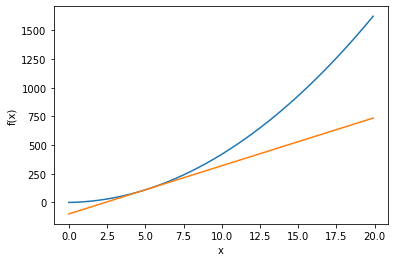

In [46]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y5)
plt.show()

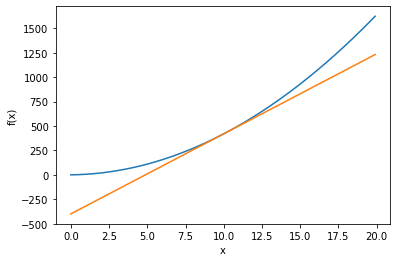

In [47]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y10)
plt.show()

In [48]:
print(
    numerical_diff(fun_x, 5)
)  # small change of x when x = 5 will slighly change y in positive direction
print(
    numerical_diff(fun_x, 10)
)  ## small change of x when x = 10 will greatly change y in positive direction

41.99999999997317
81.99999999987995


- In python, we use the **numerical differentiation** method to find the derivative of $f(x)$ when x = 5 and 10.
- We can use the **analytic differentiation** method and derive the **derivatie function** $f'(x)$ first:

$$
f'(x) = \frac{\partial f}{\partial x}= 4x^2 + 2x = 8x + 2
$$

- Numerical differentiation produces derivatives with errors; analytic differentiation produces exact derivatives.

### Partial Derivatives

- When a function has many parameters, we can take the derivate of the function with respect to one particular parameter. 
- This parameter-specific derivative is called **partial derivative**.
- Take the partial derivatives of the following function:

$$ f(x_0, x_1)=x_0^2 + x_1^2 $$

- Once if we have defined the function for the model (e.g., the Loss Function), we can calculate to what extent the change in weights would affect the change in the function.
- The partial derivative refers to how a change in a specific weight $x_1$ affects the function, i.e., the Loss Function or the total error.

$$\frac{\partial f}{\partial x_1}$$

In [49]:
## fun_2 has two variables/weights
def fun_2(x):
    return x[0]**2 + x[1]**2

- When $x_0=3$ and $x_1=4$, compute the partial derivative of $x_0$, $\frac{\partial f}{\partial x_0}$

In [50]:
def fun_2_tmp1(x0):
    return x0**2 + 4.0**2


numerical_diff(fun_2_tmp1, 3.0)

6.00000000000378

- When $x_0=3$ and $x_1=4$, compute the partial derivative of $x_1$, $\frac{\partial f}{\partial x_1}$

In [51]:
def fun_2_tmp2(x1):
    return 3.0**2 + x1**2


numerical_diff(fun_2_tmp2, 4.0)

7.999999999999119

## References

- I highly recommend the following two books for deep learning with Python:
    - [Deep Learning：用Python進行深度學習的基礎理論實作](https://www.books.com.tw/products/0010761759)
    - [Deep Learning 2｜用Python進行自然語言處理的基礎理論實作](https://www.books.com.tw/products/0010817138?loc=P_br_r0vq68ygz_D_2aabd0_B_1)
- This post collections a comprehensive list of learning resourcess for deep learning: [史上最完整機器學習自學攻略！我不相信有人看完這份不會把它加進我的最愛](https://buzzorange.com/techorange/2017/08/21/the-best-ai-lesson/).
- Taylor, Michael. (2017). Neural Networks: A Visual Introduction for Beginners. (cf. Course Data) 
